In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
print(torch.cuda.is_available())

2.4.0+cu121
True


## Intro to Tensors

In mathematics, a tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space.

Tensors are multi-dimensional arrays with a uniform type (called a dtype).All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

### Creating Tensors

PyTorch tensors are created using `torch.Tensor()`

In [2]:
#Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim #has no dimension

0

In [4]:
# Get tensor back as Python int
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

Vector has magnitude and direction. Magnitude is length and direction is where its pointing

In [6]:
vector.ndim # has one dimension

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
# MATRIX

MATRIX = torch.tensor([[7,8],
                       [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
MATRIX[1]

tensor([ 9, 10])

In [12]:
# TENSOR

TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])

TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
TENSOR.ndim

3

In [14]:
TENSOR.shape

torch.Size([1, 3, 3])

In [15]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [16]:
TENSOR[0][0]

tensor([1, 2, 3])

In [17]:
TENSOR[0][0][0]

tensor(1)

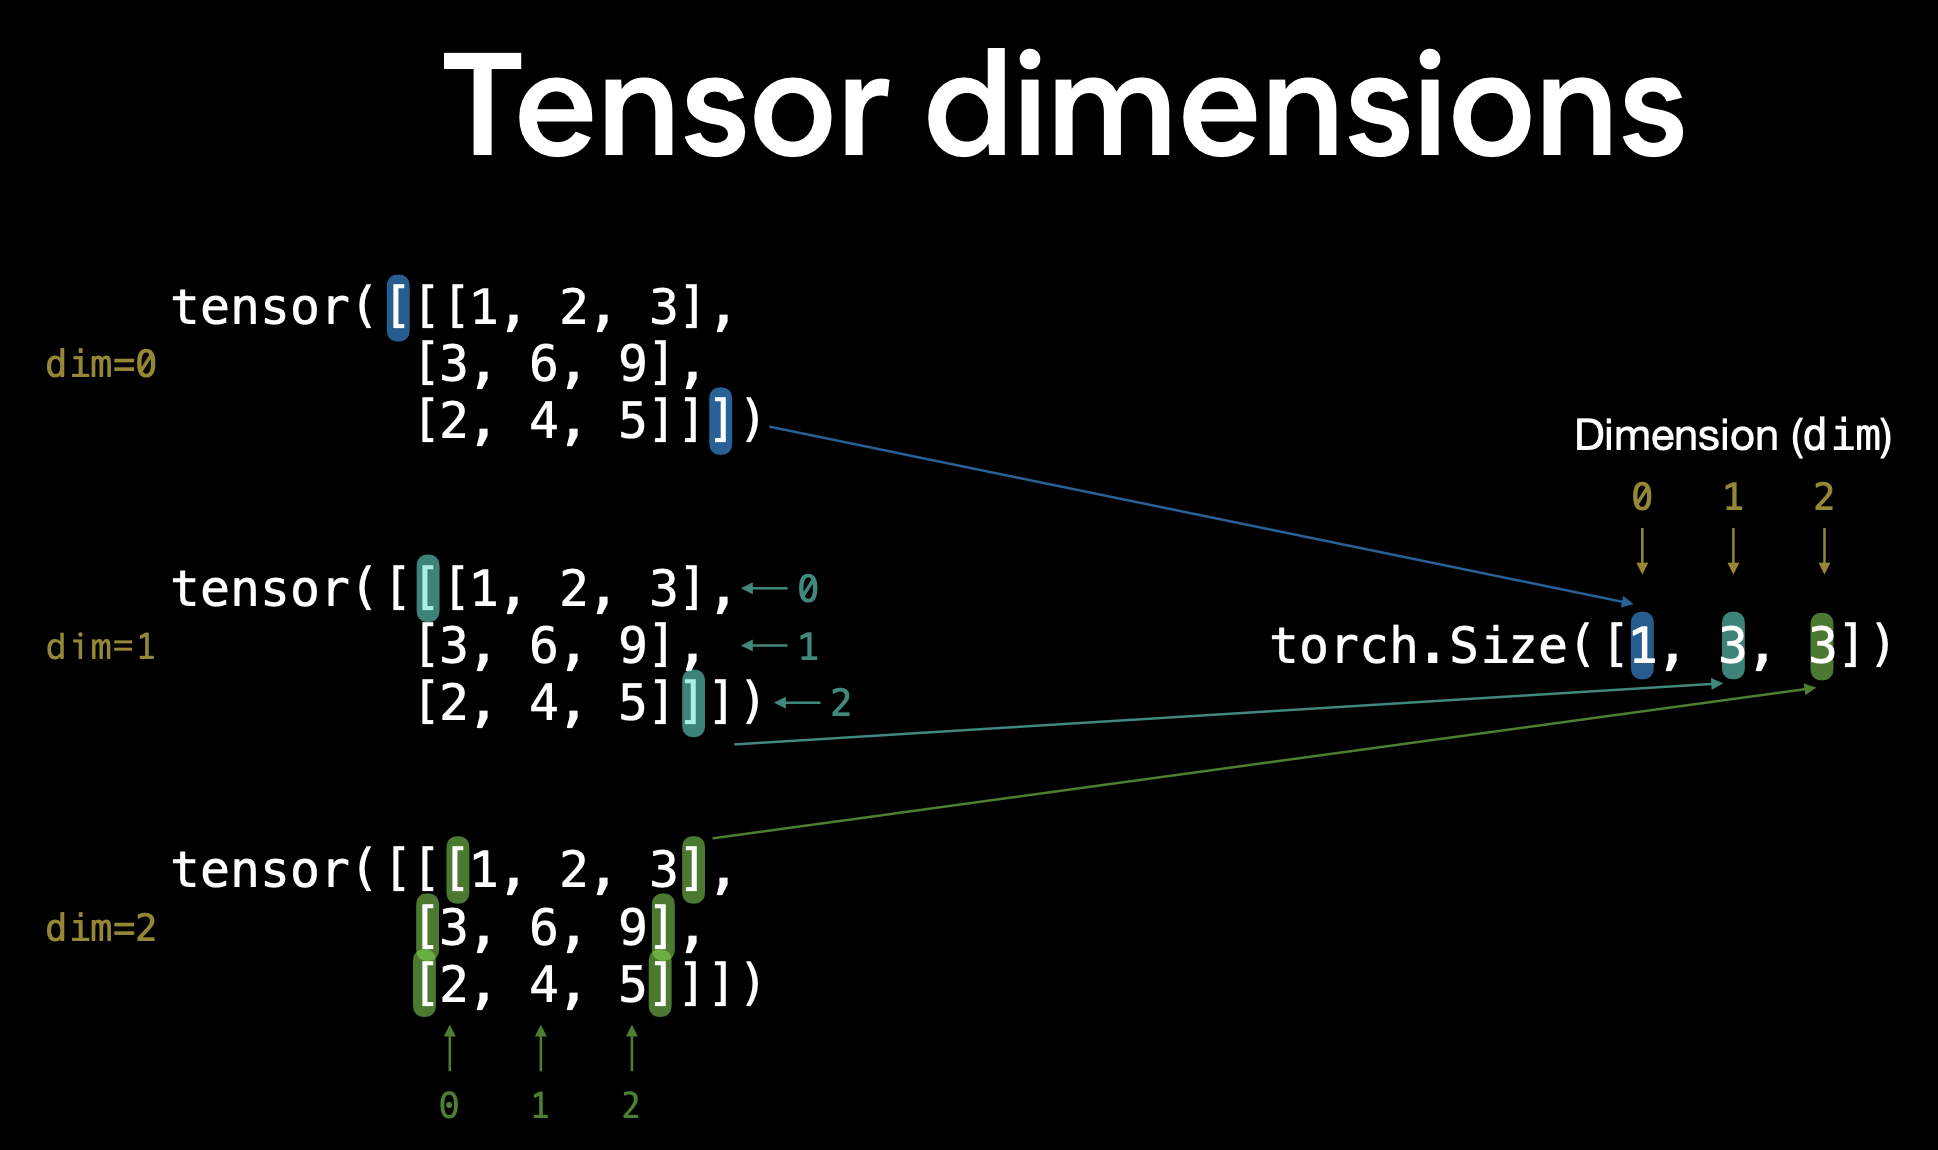

Generally in papers scalar and vectors shown as lower case, matrix and tensors shown as upper case

### Random Tensors

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.



```
Start with random numbers -> Look at data -> Update random numbers -> Look at data -> Update random numbers
```



In [18]:
# Create a random tensor of size (3,4)

random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.5819, 0.2461, 0.4320, 0.3410],
        [0.1435, 0.4554, 0.2374, 0.7152],
        [0.0942, 0.9750, 0.7347, 0.1566]])

In [19]:
# Create a random rensor with similiar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3,224,224)) # color channels (R,G,B), height, width
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

### Zeros and ones

In [20]:
# Create a tensor of all zeros , useful for masking

zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [21]:
# Create a tensor of all ones

ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [22]:
ones.dtype

torch.float32

In [23]:
random_tensor.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [24]:
# Use torch.range()

one_to_ten = torch.arange(1,11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
torch.arange(start=1,end=1000,step=77)

tensor([  1,  78, 155, 232, 309, 386, 463, 540, 617, 694, 771, 848, 925])

In [26]:
# Creating tensors like

ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

[All datatypes](https://pytorch.org/docs/stable/tensors.html)

The bit size in computing refers to the number of bits used to represent data. A higher bit size allows for more precise representation of values. For example:

- 8-bit can represent 256 values (0 to 255), providing limited precision.
- 16-bit offers 65,536 values, increasing precision.
- 32-bit and 64-bit provide exponentially more values, significantly enhancing precision.

In floating-point numbers, a larger bit size also reduces rounding errors, allowing for more accurate calculations.

**Note:** Tensor datatypes is one of the 3 big errors you'll run into Pytorch and DL:

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on right device


In [27]:
# Float32 Tensor

float_32_tensor = torch.tensor([3.0,6.0,9.0],dtype = None, #What datatype is the tensor (e.g. float32 or float16)
                               device= None, # Defualt is CPU, operations done with tensors on same device
                               requires_grad=False # Track gradients
                               )

float_32_tensor

tensor([3., 6., 9.])

In [28]:
float_32_tensor.dtype # Because default datatype is float32

torch.float32

In [29]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

### Getting Information from Tensors

- To get datatype from a tensor,`tensor.dtype`
- To get shape from a tensor, `tensor.shape`
- To get device from a tensor, `tensor.device`




In [30]:
some_tensor = torch.rand(3,5)
some_tensor

tensor([[0.1270, 0.0365, 0.5943, 0.7747, 0.2400],
        [0.2364, 0.5271, 0.7131, 0.9888, 0.3346],
        [0.3057, 0.1955, 0.0160, 0.8980, 0.9213]])

In [31]:
# Find out details about it

print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.1270, 0.0365, 0.5943, 0.7747, 0.2400],
        [0.2364, 0.5271, 0.7131, 0.9888, 0.3346],
        [0.3057, 0.1955, 0.0160, 0.8980, 0.9213]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 5])
Device tensor is on: cpu


### Manipulating Tensors (Tensor Operations)

Tensor operations include:
* Addition
* Substraction
* Multiplication
* Division
* Matrix Multiplication

In [32]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [33]:
# Multiply tensor by 10

tensor * 10

tensor([10, 20, 30])

In [34]:
# Substract ten
tensor - 10

tensor([-9, -8, -7])

In [35]:
# Division by ten
tensor / 10

tensor([0.1000, 0.2000, 0.3000])

In [36]:
# Try out PyTorch in-built functions -- Not Common
torch.mul(tensor,10)

tensor([10, 20, 30])

#### Matrix Multiplication

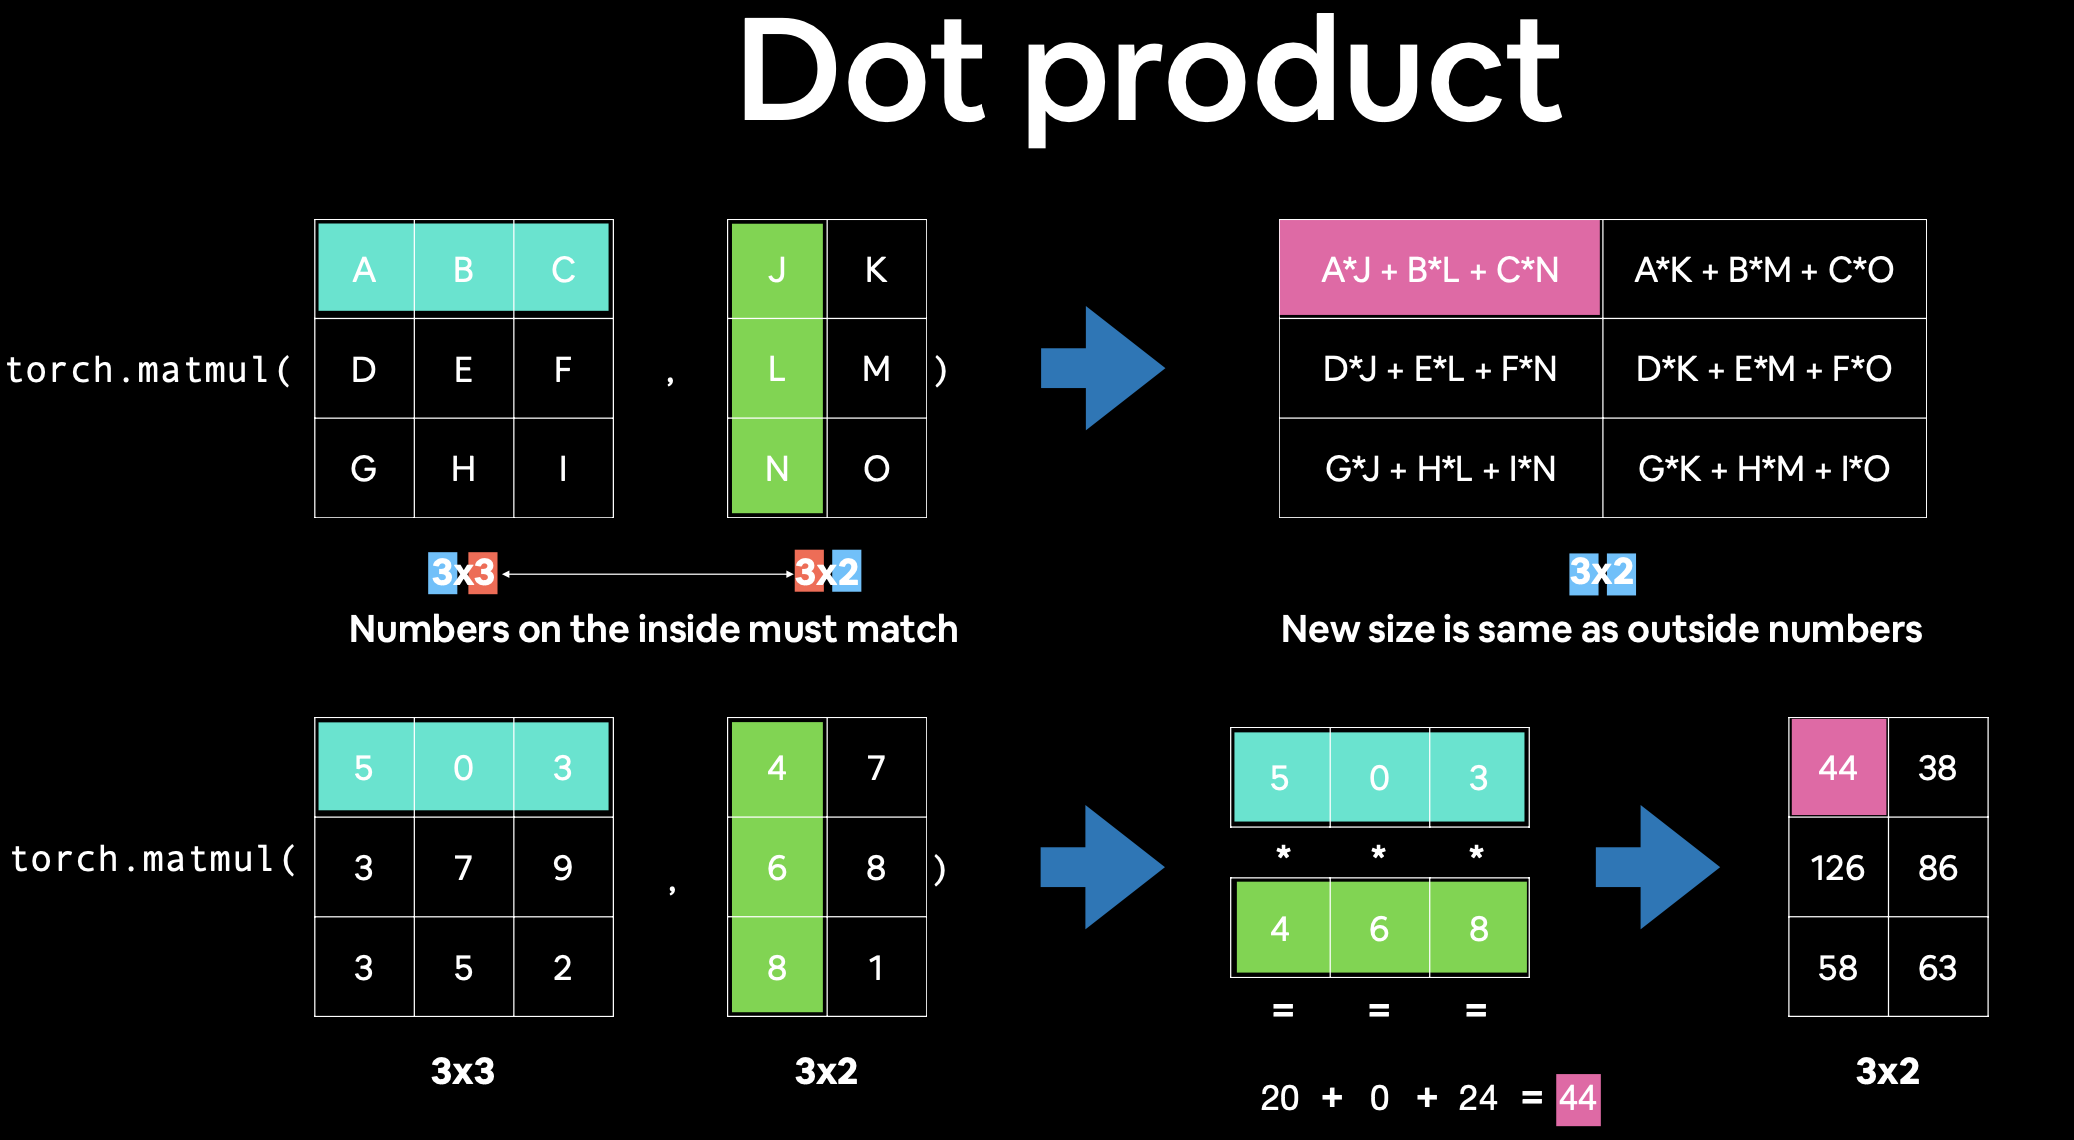

Matrix multiplication involves multiplying two matrices to produce a new matrix. Key points include:

**Compatibility:** The number of columns in the first matrix must equal the number of rows in the second matrix.

**Element Calculation:** Each element in the resulting matrix is calculated by taking the dot product of the corresponding row from the first matrix and the column from the second matrix.

    - The dot product is a mathematical operation that takes two equal-length vectors and returns a single scalar value.
    - The dot product is calculated by multiplying corresponding elements of the two vectors and then summing these products.
    - The dot product represents the product of the magnitudes of the two vectors and the cosine of the angle between them.
    - If the dot product is zero, the vectors are orthogonal.

In [37]:
# Element wise multip.

print(tensor, "*", tensor)
print(f"Equals: {tensor*tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [38]:
# Matrix Multip.

torch.matmul(tensor, tensor)

tensor(14)

In [39]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 310 µs, sys: 889 µs, total: 1.2 ms
Wall time: 1.48 ms


In [40]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 38.4 µs


tensor(14)

Much more faster with using PyTorch function

There are two main rules that performing matrix multiplication needs to satisfy:



1.   The **inner dimensions** must match:
* `(3,2) @ (3,2)` won't work
* `(2,3) @ (3,2)` will work
2.   The resulting matrix has the shape of the **outer dimensions**:
* `(2,3) @ (3,2)` -> `(2,2)`



In [41]:
# Shapes for matrix multip.

tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])

torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [42]:
print(f"Shape of A:" , tensor_A.shape)
print(f"Shape of B:" , tensor_B.shape)

Shape of A: torch.Size([3, 2])
Shape of B: torch.Size([3, 2])


To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor.

In [43]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [44]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [45]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

## Finding the Min, Max, Mean, Sum, etc (tensor aggregation)

In [46]:
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [47]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [48]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [49]:
# Find the mean
torch.mean(x)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [50]:
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [51]:
# Find the sum

torch.sum(x), x.sum()

(tensor(450), tensor(450))

Finding positional min, max, [index value]





In [52]:
x.argmin(), x.argmax()

(tensor(0), tensor(9))

## Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - reshape an input tensor to a defined shape
* View - return a view of an input tensor of certain shape but keep the same memory
* Stacking - combine multiple tensors on top of each other or side by side
* Squeeze -  removes all '1' dim. from a tensor
* Unsqueeze - add a '1' dim. to a target tensor
* Permute - return a view of the input with dim. permuted (swapped) in a certain way

In [53]:
x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [54]:
# Add an extra dimension
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [55]:
#Change the view
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [56]:
# Changing z changes x because a view of a tensor shares the same memory as the original input
z[:,0] = 5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [57]:
# Stack tensors on top eachother
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [58]:
x_stacked = torch.stack([x,x,x,x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [59]:
# Squeeze tensor
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [60]:
x_reshaped.squeeze(), x_reshaped.squeeze().shape

(tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [61]:
# Unsqueeze tensor
x_squeezed = x_reshaped.squeeze()

x_unsqueezed = x_squeezed.unsqueeze(dim=0)
x_unsqueezed, x_unsqueezed.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [62]:
# Permute - rearranges the dim. of a target tensor in a specified order / comman in images

x_original = torch.rand(size=(224,224,3)) # [height, width, colour_channels]

# Permute the original tensor to reaarange the axis (or dim)
x_permuted = x_original.permute(2,0,1) # [colour_channels, height, width]

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


### Indexing

Selecting data from tensors. Indexing with PyTorch is similar to indexing with Numpy

In [63]:
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [64]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [65]:
x[0][0]

tensor([1, 2, 3])

In [66]:
x[0][0][0]

tensor(1)

In [67]:
x[0,1,1]

tensor(5)

In [68]:
# You can also use ':' to seleck "all" of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [69]:
x[:,:,1]

tensor([[2, 5, 8]])

In [70]:
x[:,1,1]

tensor([5])

In [71]:
x[0,0,:]

tensor([1, 2, 3])

In [72]:
x[0,:,2]

tensor([3, 6, 9])

In [73]:
x[0,2,2]

tensor(9)

## Pytorch tensors with Numpy

Numpy is a popular scientific Python numerical computing library.

And because of this, PyTorch has functionality to interact with it.

* Data in Numpy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
* Pytorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [74]:
array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [75]:
array.dtype # thats why tensor created from numpy has float64 dtype

dtype('float64')

In [76]:
# Change the value of arrayi what will this do to 'tensor'?

array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [77]:
# Tensor to Numpy array

tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [78]:
numpy_tensor.dtype

dtype('float32')

In [79]:
# Change the tensor, what happens to 'numpy_tensor'?

tensor = tensor + 1
tensor, numpy_tensor #Means they do not share memory

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take the random out of random)

In short how a neural network work learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again ->...`

To reduce randomness in NN and pytorch comes the concept of a **random seed**.

Essentially what the random seed does is "flaour" the randomnees.

In [80]:
# Create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)

print(random_tensor_A == random_tensor_B)

tensor([[0.0325, 0.8086, 0.2467, 0.6071],
        [0.0889, 0.4689, 0.7645, 0.4846],
        [0.3319, 0.4955, 0.8029, 0.0715]])
tensor([[0.2489, 0.1961, 0.4693, 0.5434],
        [0.5331, 0.1822, 0.9798, 0.0178],
        [0.0876, 0.3553, 0.8529, 0.1942]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [81]:
# Random but reproducible tensors

#Set the random seed
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED) #only works one block of code
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)

print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on GPUs

GPUs = faster computation on numbers

### 1. Getting a GPU

- Easiest - Use Google Colab
- Use your own GPU
- Use cloud computing, GCP, AWS, Azure, etc.


In [82]:
!nvidia-smi

Fri Sep  6 10:55:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Check for GPU access with PyTorch



In [83]:
torch.cuda.is_available() # Now False because we spend our daily limit

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practise to setup device agnostic code:

[CUDA Semantics](https://pytorch.org/docs/stable/notes/cuda.html)

E.G. run on GPU if availablei else defualt to CPU

In [84]:
# Setup device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [85]:
# Count number of devices

torch.cuda.device_count()

1

## Putting tensors (or models) on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [86]:
# Create a tensor (defualt on CPU)

tensor = torch.tensor([1,2,3])

print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [87]:
# Move tensor to GPU (if available)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu, tensor_on_gpu.device

(tensor([1, 2, 3], device='cuda:0'), device(type='cuda', index=0))

### 4. Moving tensors back to CPU

If tensor on GPU can't transform it to Numpy

In [88]:
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

## Exercises

1- Create a random tensor with shape (7, 7). Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [94]:
tensor_A = torch.rand(size=(7,7))
tensor_B = torch.rand(size=(1,7))

torch.matmul(tensor_A, tensor_B.T)

tensor([[2.5413],
        [2.3552],
        [1.9176],
        [1.4100],
        [1.7897],
        [1.8680],
        [2.0831]])

2- Set the random seed to 0. and do calc. again.

In [97]:
RANDOM_SEED = 0

torch.manual_seed(RANDOM_SEED)
tensor_A = torch.rand(size=(7,7))

torch.manual_seed(RANDOM_SEED)
tensor_B = torch.rand(size=(1,7))

torch.matmul(tensor_A, tensor_B.T)

tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])

Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for torch.cuda for this one)
* If there is, set the GPU random seed to 1234.

In [96]:
torch.cuda.initial_seed()

0

In [98]:
torch.cuda.manual_seed(1234)

Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).

In [99]:
torch.manual_seed(1234)

tensor_A = torch.rand(size=(2,3)).to(device)
tensor_B = torch.rand(size=(2,3)).to(device)

tensor_A, tensor_B

(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))

Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

In [101]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]], device='cuda:0')

Find the maximum and minimum values of the output

In [102]:
answer = torch.matmul(tensor_A, tensor_B.T)

In [104]:
torch.min(answer), torch.max(answer)

(tensor(0.3647, device='cuda:0'), tensor(0.5617, device='cuda:0'))

Find the maximum and minimum index values of the output

In [105]:
torch.argmin(answer), torch.argmax(answer)

(tensor(0, device='cuda:0'), tensor(3, device='cuda:0'))

Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.
The output should look like:



```
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])
```



In [106]:
SEED = 7

torch.manual_seed(SEED)

tensor = torch.rand(size=(1,1,1,10))
tensor, tensor.shape


(tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
            0.3653, 0.8513]]]]),
 torch.Size([1, 1, 1, 10]))

In [107]:
tensor.squeeze(), tensor.squeeze().shape

(tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
         0.8513]),
 torch.Size([10]))